In [1]:
from archs.unet import unet
from archs.fcn8 import fcn8
from functions import *
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()

In [2]:
# Variables
filters = 8
shape = (256,256,1)
epochs = 100
batch = 8
lung = False
sample_size = 2000

In [3]:
if lung:
    img_path = "./datasets/lungs/img"
    mask_path = "./datasets/lungs/mask"
    classes = 1
else:
    img_path = "./datasets/balanced_tomo/img"
    mask_path = "./datasets/balanced_tomo/mask"
    classes = 3

X_train, y_train = load_dataset(img_path, mask_path, classes, sample_size, (shape[0], shape[1]))# load_dataset(img_path, mask_path, classes, sample_size)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)
print(X_train.shape, X_test.shape)

(1500, 256, 256) (500, 256, 256)


In [4]:
model = unet(filters, classes, shape)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss = [dice_loss],
              metrics = [dice_coefficient])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
checkpoint = ModelCheckpoint(filepath='model.h5', save_freq = 'epoch')
#model.load_weights("model.h5")
history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch, callbacks = [checkpoint], validation_data=(X_test, y_test))

Epoch 1/100
188/188 [==============================] - 36s 132ms/step - loss: 0.0405 - dice_coefficient: 0.9595 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 2/100
188/188 [==============================] - 22s 118ms/step - loss: 0.0034 - dice_coefficient: 0.9966 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 3/100
188/188 [==============================] - 23s 120ms/step - loss: 0.0034 - dice_coefficient: 0.9966 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 4/100
188/188 [==============================] - 23s 122ms/step - loss: 0.0034 - dice_coefficient: 0.9966 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 5/100
188/188 [==============================] - 23s 122ms/step - loss: 0.0034 - dice_coefficient: 0.9966 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 6/100
188/188 [==============================] - 23s 123ms/step - loss: 0.0034 - dice_coefficient: 0.9966 - val_loss: 0.0037 - val_dice_coefficient: 0.9963
Epoch 7/100
188/188 [=======

In [6]:
a = X_test[0:200]
test = np.argmax(model.predict(a), axis=-1)
mask_test = np.argmax(y_test[0:200], axis=-1)

7/7 [==============================] - 4s 84ms/step


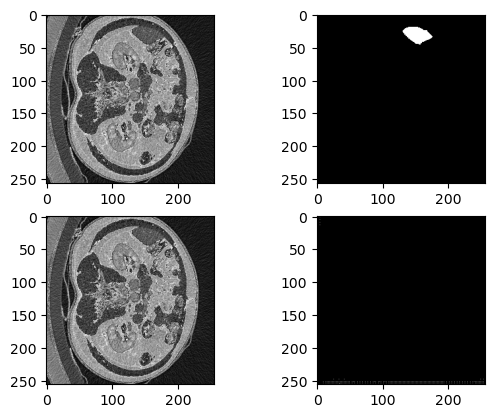

In [7]:
image_id = 52

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_test[image_id], cmap = 'gray')
axarr[0,1].imshow(mask_test[image_id], cmap = 'gray', vmin=0, vmax=1)
axarr[1,0].imshow(X_test[image_id], cmap = 'gray')
axarr[1,1].imshow(test[image_id], cmap = 'gray', vmin=0, vmax=2)

plt.show()

In [8]:
#print(np.max(test))
np.max(mask_test)

2

In [9]:
import pickle


with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)